I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work

**Import required libraries**

In [ ]:
'''Importing Library'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

 **Read, preprocess and print main statistic about the dataset**

In [ ]:
'''Read the CSV File and Making a DataFrame'''

df=pd.read_csv("insurance.csv")
df=pd.DataFrame(df)

In [ ]:
'''Print the DataFrame'''

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
'''Basic Information of the dataset'''

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
'''Converting SEX to number feature'''

df.sex = [1 if each == "female" else 0 for each in df.sex]

In [ ]:
'''Converting SMOKER to number feature'''

df.smoker = [1 if each == "yes" else 0 for each in df.smoker]

In [ ]:
'''Converting REGION to number feature'''

region = {'southwest':1,'southeast':2, 'northwest': 3,'northeast':4}
df.region = [region[item] for item in df.region] 

In [ ]:
'''displaying the dataframe with modifications'''
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       4   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       1   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


In [ ]:
'''Basic Statistics of the Dataset- DESCRIBE'''

print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.484305  13270.422265  
std       1.104885  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       2.000000   9382.033000  
75%       3.000000  16639.912515  
max       4.000000  63770.428010  


In [ ]:
'''Correlation of the Dataset'''

df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [ ]:
'''Dropping Column Sex,children,region as the have a very correlation to charges'''

df = df.drop(["sex", "children", "region"], axis=1)

In [ ]:
'''Printing Head of the dataset'''
df.head

<bound method NDFrame.head of       age     bmi  smoker      charges
0      19  27.900       1  16884.92400
1      18  33.770       0   1725.55230
2      28  33.000       0   4449.46200
3      33  22.705       0  21984.47061
4      32  28.880       0   3866.85520
...   ...     ...     ...          ...
1333   50  30.970       0  10600.54830
1334   18  31.920       0   2205.98080
1335   18  36.850       0   1629.83350
1336   21  25.800       0   2007.94500
1337   61  29.070       1  29141.36030

[1338 rows x 4 columns]>

In [ ]:
x=df[['age','bmi','smoker']]
print(x)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]


**Normalizing Data**

In [ ]:
'''normailizing data of X'''

x_norm= x.copy()

for column in x_norm.columns:
    x_norm[column] = x_norm[column]  / x_norm[column].abs().max()
      
# view normalized data
display(x_norm)

,age,bmi,smoker
0,0.296875,0.525127,1.0
1,0.281250,0.635611,0.0
2,0.437500,0.621118,0.0
3,0.515625,0.427348,0.0
4,0.500000,0.543572,0.0
...,...,...,...
1333,0.781250,0.582910,0.0
1334,0.281250,0.600791,0.0
1335,0.281250,0.693582,0.0
1336,0.328125,0.485601,0.0


**Selecting** **y_test**

In [ ]:
y=df[['charges']]
print(y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


**print x_train, x_test**

In [ ]:
x_train = x_norm.sample(frac = 0.80)
x_test = x_norm.drop(x_train.index)

print(x_train.shape)
print(x_test.shape)

(1070, 3)
(268, 3)


**print y_train, y_test**

In [ ]:
y_train = y.sample(frac = 0.80)
y_test = y.drop(y_train.index)

print(y_train.shape)
print(y_test.shape)

(1070, 1)
(268, 1)


**RIDGE REGRESSION**

**Prediction function**

In [ ]:
def predict(x, w, b) :    
        return x.dot(w) + b

**CalulateOLS function**

In [ ]:
def CalculateOLS(x, y, lam = 100):
  r, c = x.shape
  w = np.dot(np.linalg.inv(np.dot(np.transpose(x),x) + lam * np.identity(c)), np.dot(np.transpose(x),y))
  return w

**ChangeWeights function**

Parts:
Gradient Descent
Weight, Bias Calulation

In [ ]:
def change_weights(x, y, w, b, l2_penality, learning_rate) :		
  Y_pred = predict(x,w,b)
  m, n = x.shape
  
  dW = ( - ( 2 * ( x.T ).dot( y - Y_pred ) ) +	( 2 * l2_penality * w ) ) / m	
  db = - 2 * np.sum( y - Y_pred ) / m
  
  w = w - learning_rate * dW	
  b = b - learning_rate * db		
  return w, b

**Function for Training the model**

In [ ]:
def fit( x, y, w, iterations, l2_penality, learning_rate) :
  b = 0	
  m, n = x.shape
      
  for i in range( iterations ) :			
    w, b = change_weights(x, y, w, b, l2_penality, learning_rate)		
  return w, b

**Finding Weight using OLS**

In [ ]:
w = CalculateOLS(x_train, y_train, lam = 10)
w

array([[ 5803.7301304 ],
       [16350.6688193 ],
       [ -215.64962067]])

**Train Model**

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
t1 = time()
w, b = fit(x_train, y_train, w, 200000, 2, np.exp(-2))
t2 = time()
print("Time for Training the model : ", t2 - t1)

Time for Training the model :  6.515612602233887


**Weight , Bias**

In [ ]:
w,b

(array([[ 100.83442789],
        [2829.51517916],
        [-912.76826531]]), 12069.329195490542)

**Find Predicted Y**

In [ ]:
y_ = predict(x_test, w, b)
y_

array([[13488.99188998],
       [13540.0081351 ],
       [12654.35634808],
       [13375.46661407],
       [13083.77974705],
       [13398.01322964],
       [13164.61877299],
       [13523.76367127],
       [13893.42989973],
       [13855.59691142],
       [12458.57201275],
       [14247.7641977 ],
       [14179.15158412],
       [13194.73040715],
       [13606.13475511],
       [12838.15756665],
       [13976.19978363],
       [14116.95190008],
       [13472.50454609],
       [13611.74759128],
       [14114.46715314],
       [12895.47430134],
       [13643.28009001],
       [14143.04839158],
       [12153.07897525],
       [13339.2091637 ],
       [13726.67157619],
       [14097.95723816],
       [12532.7092558 ],
       [13147.42078905],
       [13706.14527191],
       [13760.20098402],
       [12947.66181753],
       [13977.79747713],
       [13882.97842534],
       [13709.49657889],
       [13899.64384478],
       [13166.45720407],
       [13773.09330977],
       [13574.18088522],


**Loss Function**

In [ ]:
def Squared_loss(A,B,w,t_len, lam =10):
  return (sum(np.square(A - B)) + (lam * np.dot(np.transpose(w),w)))/ (2*t_len)

**Calculate Squared Loss for Testing**

In [ ]:
y_test=np.array(y_test)

loss = Squared_loss(y_test, y_, w, y_test.shape[0])
loss

array([[71648846.05721743]])

**Calculate Squared Loss for Training**

In [ ]:
y_train_pred = np.array(y_train)
loss_train = Squared_loss(y_train,predict(x_train, w, b)[0], w, y_train.shape[0])
loss_train

array([74374720.96260607])

**Plot Graph of Predicted output and Actual output**

**Color Classification:**
(Blue dots : Actual Output Data), 
(Orange : Predicted Output)

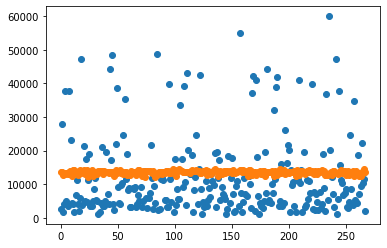

In [ ]:
plt.scatter([i for i in range (y_test.shape[0])], y_test)
plt.scatter([i for i in range (y_.shape[0])], y_)
plt.plot()
plt.show()

**Gradient descent using SK LEARN**

Calculate Predicted Time to train the model

In [76]:

from sklearn.linear_model import Ridge

t0=time()
rdg = Ridge(alpha = np.exp(-2),max_iter=200000, solver = "sag")

rdg.fit(x_train,y_train)
t1=time()

print ("predict time: ",(t1-t0))

rdg.score(x_train,y_train)


predict time:  0.010349750518798828


0.0018543445281785642

Predict the value of Y

In [77]:
x_test = np.array(x_test)
y_pred=rdg.predict(x_test)

**Testing Loss Calculation**

In [78]:
#calculating test error and accuracy

w = rdg.coef_[0]
loss2 = Squared_loss(y_test, y_pred, np.array(w), y_test.shape[0])
loss2

array([71747207.82940386])

In [79]:
#Training Loss Calculation
w = rdg.coef_[0]
loss2 = Squared_loss(y_train, rdg.predict(x_train)[0], np.array(w), y_train.shape[0])
loss2

array([74234137.47551335])

**Graph for Actual Output vs Predicted Output using SKlearn**

**Color Classification:**
(Blue dots : Actual Output Data), 
(Orange : Predicted Output)

**Axis Classification:**
(x : Number of outputs),
(y : Output Data)

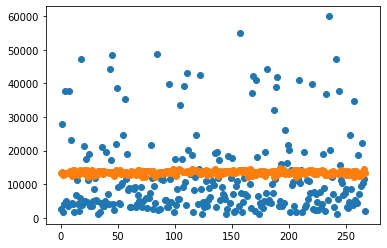

In [80]:
plt.scatter([i for i in range (y_test.shape[0])], y_test)
plt.scatter([i for i in range (y_pred.shape[0])], y_pred)
plt.plot()
plt.show()

**Graph for Predicted Output Implemented from Scratch vs SKlearn**

**Color Classification:** (Blue dots : SKLearn Predicted Output Data), (Orange : From Scratch Predicted Output)

**Axis Classification:**
(x : Number of outputs),
(y : Output Data)

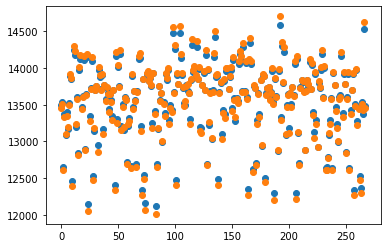

In [81]:
plt.scatter([i for i in range (y_.shape[0])], y_)
plt.scatter([i for i in range (y_pred.shape[0])], y_pred)
plt.plot()
plt.show()

